## Etapa 1 CRISP - DM: Entendimento do negócio

Como primeira etapa do CRISP-DM, vamos entender do que se trata o negócio, e quais os objetivos. 

Este é um problema de concessão de cartões de crédito, publicado no [Kaggle](https://www.kaggle.com/), uma plataforma que promove desafios de ciência de dados, oferecendo prêmios em dinheiro para os melhores colocados. O link original está [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).  
  
Essa é uma base de proponentes de cartão de crédito, nosso objetivo é construir um modelo preditivo para identificar o risco de inadimplência (tipicamente definida pela ocorrência de um atraso maior ou igual a 90 em um horizonte de 12 meses) através de variáveis que podem ser observadas na data da avaliação do crédito (tipicamente quando o cliente solicita o cartão).

Atividades do CRISP-DM:

- Objetivos do negócio
Note que o objetivo aqui é que o modelo sirva o mutuário (o cliente) para que avalie suas próprias decisões, e não a instituição de crédito.
- Objetivos da modelagem
O objetivo está bem definido: desenvolver o melhor modelo preditivo de modo a auxiliar o mutuário a tomar suas próprias decisões referentes a crédito.
  
Nessa etapa também se avalia a situação da empresa/segmento/assunto de modo a se entender o tamanho do público, relevância, problemas presentes e todos os detalhes do processo gerador do fenômeno em questão, e portanto dos dados.

Também é nessa etapa que se constrói um planejamento do projeto.

#### Carregamento de pacotes:

In [2]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

#### Carregando os dados:

In [3]:
df = pd.read_csv("./input/demo01.csv")
df.shape

(16650, 16)

In [4]:
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


## Etapa 2 Crisp-DM: Entendimento dos dados
A segunda etapa é o entendimento dos dados. Foram fornecidas 15 variáveis mais a variável resposta (em negrito na tabela). O significado de cada uma dessas variáveis se encontra na tabela.

#### Dicionário de dados



| Coluna            | Descrição                                         | Tipo  |
| ------------------------ |:---------------------------------------------------:| -----:|
| sexo| M = 'Masculino'; F = 'Feminino' |M/F|
| posse_de_veiculo| Y = 'possui'; N = 'não possui' |Y/N|
| posse_de_imovel| Y = 'possui'; N = 'não possui' |Y/N|
| qtd_filhos| Quantidade de filhos |inteiro|
| tipo_renda|Tipo de renda (ex: assaliariado, autônomo etc) | texto |
| educacao| Nível de educação (ex: secundário, superior etc) |texto|
| estado_civil | Estado civil (ex: solteiro, casado etc)| texto |
| tipo_residencia | tipo de residência (ex: casa/apartamento, com os pais etc) | texto |
| idade | idade em anos |inteiro|
| tempo de emprego | tempo de emprego em anos |inteiro|
| possui_celular | Indica se possui celular (1 = sim, 0 = não) |binária|
| possui_fone_comercial | Indica se possui telefone comercial (1 = sim, 0 = não) |binária|
| possui_fone | Indica se possui telefone (1 = sim, 0 = não) |binária|
| possui_email | Indica se possui e-mail (1 = sim, 0 = não) |binária|
| qt_pessoas_residencia | quantidade de pessoas na residência |inteiro|
| **mau** | indicadora de mau pagador (True = mau, False = bom) |binária|


In [5]:
qtd_total = len(df)

qtd_adimplentes = len(df[df['mau'] == 0])
print('Numero de clientes adimplentes: ',qtd_adimplentes)

qtd_inadimplentes = len(df[df['mau'] == 1])
print('Numero de clientes inadimplentes: ',qtd_inadimplentes)

print('Porcentagem de clientes adimplentes: ', round(100 * qtd_adimplentes / qtd_total , 2),'%')
print('Porcentagem de clientes inadimplentes',round(100 * qtd_inadimplentes / qtd_total , 2),'%')


Numero de clientes adimplentes:  16260
Numero de clientes inadimplentes:  390
Porcentagem de clientes adimplentes:  97.66 %
Porcentagem de clientes inadimplentes 2.34 %


In [6]:
df.isnull().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

Não há nenhum dado faltante. Sendo assim, sigo para a exploração dos dados presentes no dataset.

#### Entendimento dos dados - Univariada

<Axes: xlabel='educacao'>

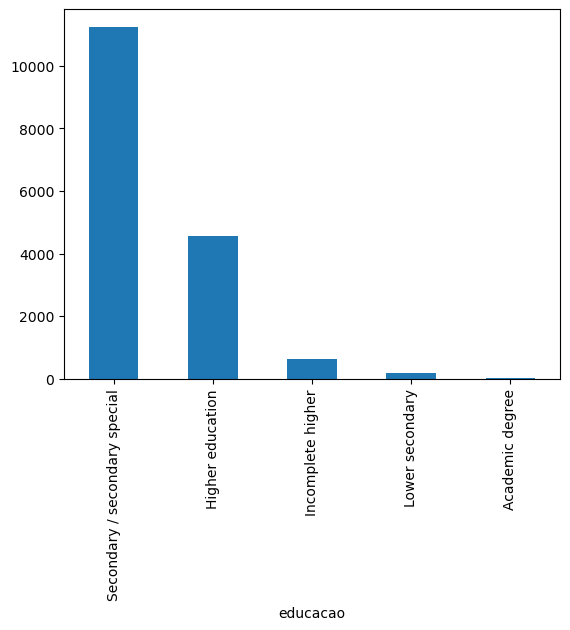

In [7]:
var = 'educacao'
df[var].value_counts().plot.bar()

<Axes: xlabel='tipo_renda'>

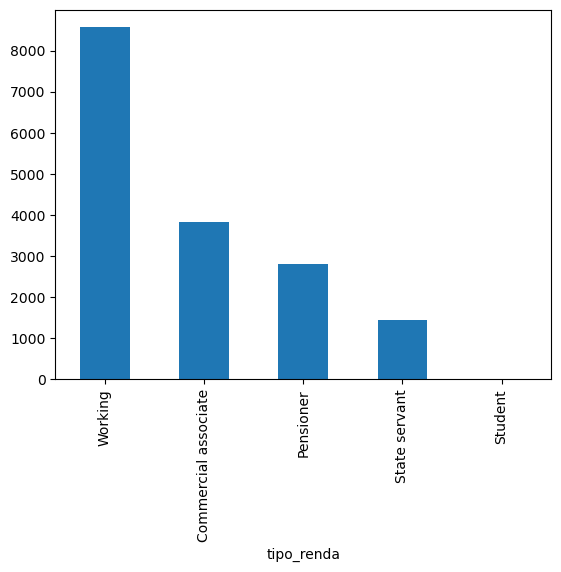

In [8]:
var = 'tipo_renda'
df[var].value_counts().plot.bar()

<Axes: xlabel='posse_de_veiculo'>

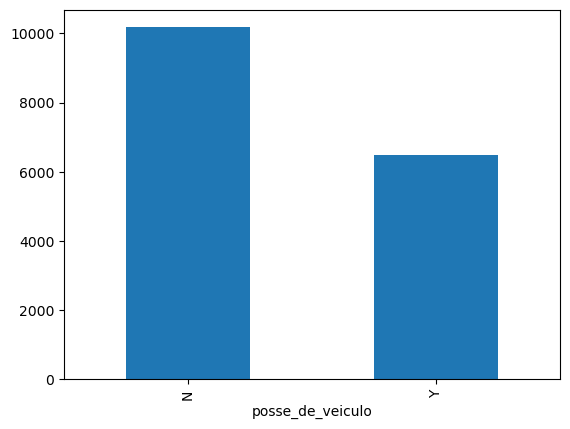

In [9]:
var = 'posse_de_veiculo'
df[var].value_counts().plot.bar()

<Axes: xlabel='posse_de_imovel'>

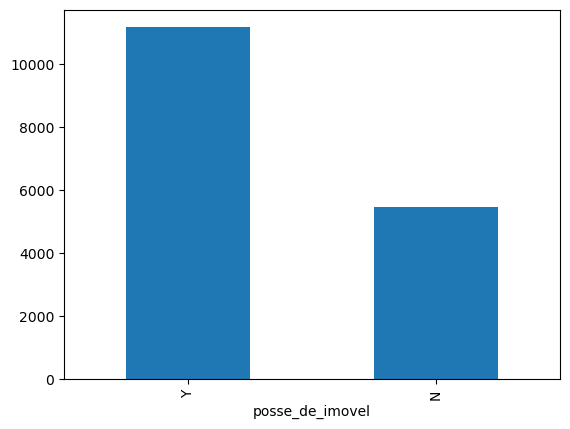

In [10]:
var = 'posse_de_imovel'

df[var].value_counts().plot.bar()

<Figure size 640x480 with 0 Axes>

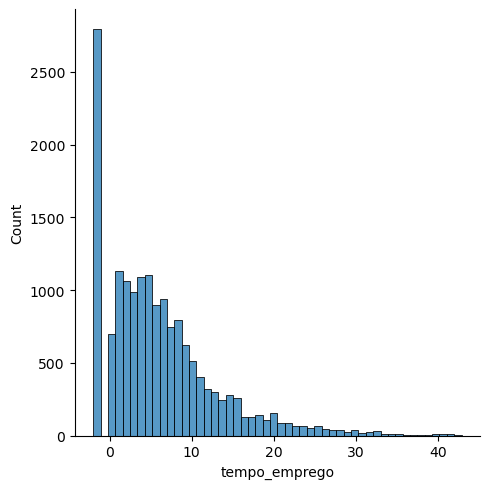

In [11]:
plt.clf()
var = "tempo_emprego"
df.loc[df[var]<0,var] = -2
sns.displot(df, x = var, bins = 50)
plt.show()

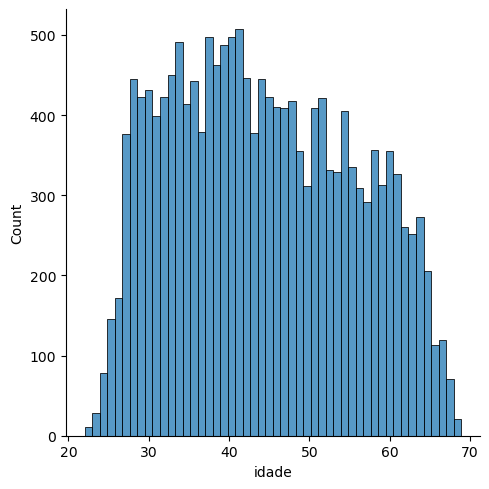

In [12]:
var = "idade"

sns.displot(df, x = var, bins = 50)
plt.show()

### Entendimento dos dados - Bivariadas


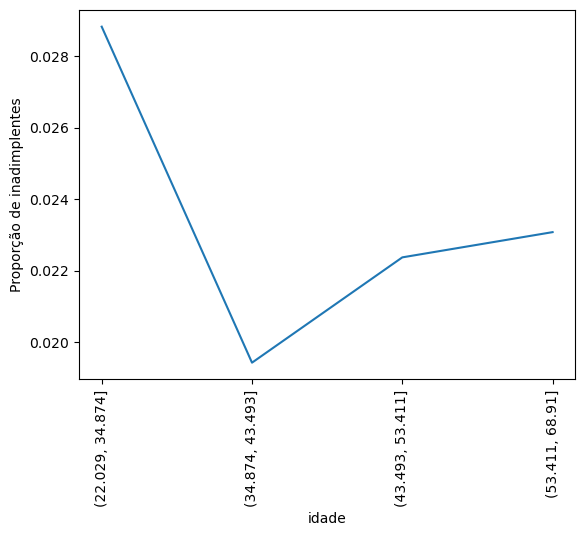

In [14]:
var = 'idade'
cat_srs, bins = pd.qcut(df[var], 4, retbins=True)
g = df.groupby(cat_srs, observed=False)
biv = g['mau'].mean()

ax = biv.plot.line()
ax.set_ylabel("Proporção de inadimplentes")
ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation = 90)

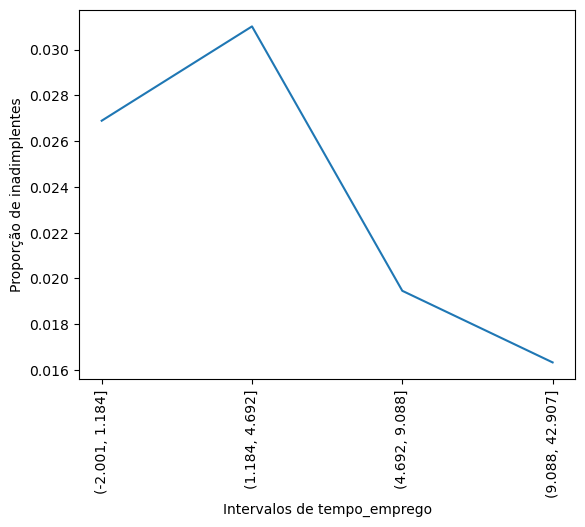

In [15]:
var = 'tempo_emprego'

cat_srs, bins = pd.qcut(df[var], 4, retbins=True)

g = df.groupby(cat_srs, observed=False)

biv = g['mau'].mean()

ax = biv.plot.line()
ax.set_ylabel("Proporção de inadimplentes")
ax.set_xlabel("Intervalos de tempo_emprego")
ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation=90)
plt.show()

- Clientes com menor tempo de emprego (até ~4,69 anos) apresentam maior taxa de inadimplência.
- Conforme o tempo de emprego aumenta, a inadimplência diminui significativamente.
- Clientes com mais de 9 anos de emprego têm a menor taxa de inadimplência.
- A variável tempo_emprego parece ser um bom discriminador de risco de crédito. Clientes com mais tempo de emprego são menos propensos à inadimplência, enquanto aqueles com pouco tempo de trabalho apresentam um risco maior.

## Etapa 3 Crisp-DM: Preparação dos dados

Como os dados ja estão selecionados nesse caso e antes ja foi verificado que não há dados faltantes, unica etapa restante na preparação dos dados é adicionar as dummies para poder utilizar os dados em algum modelo.

In [16]:
def processar_dataframe(df: pd.DataFrame):
    df_processado = df.copy()
    
    colunas_para_converter = df_processado.select_dtypes(include=['object']).columns.tolist()

    for coluna in colunas_para_converter:
        if coluna in df_processado.columns:
            
            categoria_mais_frequente = df_processado[coluna].mode()[0]
            
            dummies = pd.get_dummies(df_processado[coluna], prefix=coluna, drop_first=False)
            
            coluna_para_remover = f"{coluna}_{categoria_mais_frequente}"
            
            if coluna_para_remover in dummies.columns:
                
                dummies = dummies.drop(columns=[coluna_para_remover])
            
            df_processado = df_processado.drop(columns=[coluna])
            
            df_processado = pd.concat([df_processado, dummies], axis=1)
    
    return df_processado

In [18]:
df = processar_dataframe(df)
df

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Lower secondary,estado_civil_Civil marriage,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,True,...,False,False,False,False,False,False,False,False,False,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,False,False,False,True,False,False,False,False,False,False
2,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,False,False,False,True,False,False,False,False,False,False
3,0,46.224658,2.106849,1,1,1,1,2.0,False,True,...,False,False,False,False,False,False,False,False,False,False
4,0,29.230137,3.021918,1,0,0,0,2.0,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,True,False,...,False,True,False,False,False,False,False,False,False,False
16646,0,43.389041,7.380822,1,1,1,0,2.0,True,False,...,False,False,False,False,False,False,False,False,False,False
16647,0,30.005479,9.800000,1,1,0,0,2.0,True,True,...,False,False,False,False,False,False,False,False,False,False
16648,0,30.005479,9.800000,1,1,0,0,2.0,True,True,...,False,False,False,False,False,False,False,False,False,False


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo.
Será utilizado a técnica de floresta aleatória (**random forest**), pois é uma técnica bastante versátil e robusta que captura bem padrões complexos nos dados, relativamente fácil de se usar e que costuma produzir excelentes resultados para uma classificação como estas.

In [19]:

x = df.drop("mau",axis = 1)
y = df["mau"]


x_train, x_test, y_train, y_test = train_test_split(x, y)

In [21]:
x_train

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_M,posse_de_veiculo_Y,...,educacao_Lower secondary,estado_civil_Civil marriage,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
15211,2,47.394521,1.030137,1,0,0,0,4.0,True,False,...,False,False,False,False,False,False,False,False,False,False
13301,0,61.364384,9.605479,1,0,0,0,2.0,False,True,...,False,False,False,False,False,False,False,False,False,False
13442,0,37.471233,6.517808,1,0,1,0,1.0,True,False,...,False,False,False,True,False,False,False,False,False,False
3994,0,32.101370,9.956164,1,0,1,0,1.0,True,False,...,False,False,False,True,False,False,False,False,False,False
13868,0,44.967123,1.704110,1,0,1,0,2.0,False,True,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6114,1,28.600000,6.164384,1,1,0,0,3.0,True,True,...,False,False,False,False,False,False,False,False,False,False
14809,0,42.643836,10.969863,1,1,1,0,2.0,True,True,...,False,False,False,False,False,False,False,False,False,False
14401,1,43.986301,10.038356,1,0,1,0,3.0,True,False,...,False,False,False,False,False,False,False,False,False,False
11746,0,27.106849,6.846575,1,1,1,0,2.0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
y_train

15211    False
13301    False
13442    False
3994     False
13868    False
         ...  
6114     False
14809    False
14401    False
11746    False
14157    False
Name: mau, Length: 12487, dtype: bool

In [32]:
clf = RandomForestClassifier(n_estimators=3)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=3)

In [33]:
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))

Acurácia: 97.41%


In [34]:
tab = pd.crosstab(index = y_pred, columns = y_test)

fpr = tab.get(False).get(True) / (tab.get(False).get(True) + tab.get(False).get(False))
print("Taxa de falso Positivo:", fpr)

tpr = tab.get(True).get(True) / (tab.get(True).get(True) + tab.get(True).get(False))
print("Taxa de verdadeiro positivo:", tpr)
tab

Taxa de falso Positivo: 0.006400787789266372
Taxa de verdadeiro positivo: 0.18811881188118812


mau,False,True
row_0,,
False,4036,82
True,26,19


In [35]:
clf1 = RandomForestClassifier(n_estimators=5)
clf1.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5)

In [36]:
y_pred = clf1.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))

Acurácia: 97.43%


In [41]:
tab = pd.crosstab(index = y_pred, columns = y_test)

fpr = tab.get(False).get(True) / (tab.get(False).get(True) + tab.get(False).get(False))
print("Taxa de falso Positivo:", fpr)

tpr = tab.get(True).get(True) / (tab.get(True).get(True) + tab.get(True).get(False))
print("Taxa de verdadeiro positivo:", tpr)
tab

Taxa de falso Positivo: 0.004677498769079271
Taxa de verdadeiro positivo: 0.2376237623762376


mau,False,True
row_0,,
False,4043,77
True,19,24


In [42]:
clf2= RandomForestClassifier(n_estimators=10)
clf2.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [43]:
y_pred = clf2.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))

Acurácia: 97.74%


In [44]:
tab = pd.crosstab(index = y_pred, columns = y_test)

fpr = tab.get(False).get(True) / (tab.get(False).get(True) + tab.get(False).get(False))
print("Taxa de falso Positivo:", fpr)

tpr = tab.get(True).get(True) / (tab.get(True).get(True) + tab.get(True).get(False))
print("Taxa de verdadeiro positivo:", tpr)
tab

Taxa de falso Positivo: 0.0034465780403741997
Taxa de verdadeiro positivo: 0.2079207920792079


mau,False,True
row_0,,
False,4048,80
True,14,21


In [45]:
clf3 = RandomForestClassifier(n_estimators=15)
clf3.fit(x_train,y_train)

RandomForestClassifier(n_estimators=15)

In [46]:
y_pred = clf3.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))

Acurácia: 97.65%


In [47]:
tab = pd.crosstab(index = y_pred, columns = y_test)

fpr = tab.get(False).get(True) / (tab.get(False).get(True) + tab.get(False).get(False))
print("Taxa de falso Positivo:", fpr)

tpr = tab.get(True).get(True) / (tab.get(True).get(True) + tab.get(True).get(False))
print("Taxa de verdadeiro positivo:", tpr)
tab

Taxa de falso Positivo: 0.004185130477597243
Taxa de verdadeiro positivo: 0.19801980198019803


mau,False,True
row_0,,
False,4045,81
True,17,20


##### Dentre os 4 modelos com diferentes calores de n_estimators o que obteve melhor desempenho considerando tanto os valores de falsos positivos, verdadeiros positivos e acurácia, foi o modelo com n_estimators = 15


## Etapa 5 Crisp-DM: Avaliação dos resultados
A etapa final do CRISP. Neste casp, a nossa avaliação termina com a acurácia. Mas em problemas futuros aprofundaremos mais - a ideia seria avaliar o impacto do uso do modelo no negócio, ou seja, o quanto o resultado financeiro melhora em detrimento da utilização do modelo.

Como um exemplo simples, considere que um cliente bom pagador deixa (em média) 5 '*dinheiros*' de lucro, e um mau pagador deixa (em média) 100 '*dinheiros*' de prejuízo.

de acordo com a matriz de confusão:

| Decisão   | lucro dos bons    | lucro dos maus | total  |
| --------- |:-----------------:|:--------------:| ------:|
| Aprovador | 4042 x 5          | 72 x (-100)    | 13.010 |
| Reprovar  |  27 x 5           | 22 x (-100)    | -2.065 |

Estariamos evitando, portanto, um prejuízo de -2.145 '*dinheiros*' - o que na prática significa um aumento no lucro.


## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor de crédito que toma as decisões com algum nível de automação - tipicamente aprovando automaticamente clientes muito bons, negando automaticamente clientes muito ruins, e enviando os intermediários para análise manual.